# Libraries and usefull functions

In [ ]:
#Importing libraries

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

import json
import os
import re
import datetime

import pprint

import pandas as pd

import matplotlib.pyplot as plt


# Test code

In [ ]:
#Opening web browser
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

#Getting the the page we want to scrap
driver.get('https://www.grainger.com/category/lighting/light-bulbs-lamps/circular-light-bulbs-lamps?categoryIndex=8')
driver.implicitly_wait(1)

#Extracting page main title
title_page = driver.find_element(By.CLASS_NAME, 'KkejIK').text
#Identification of each sections of the page. Creating an empty dictionary to save the data.
sections = driver.find_elements(By.CLASS_NAME, 'MAcbb-')
section_dict = {}

#Looping throught each section to get the information we want which are the tables
for section in sections :
    #Extracting section title
    title_section = section.find_element(By.CLASS_NAME, "sC0Aof").text
    sub_section_dict = {}
    section_dict[title_section] = sub_section_dict
    
    #if there is sub section, we looping throught ever sub-section to extract every table
    if section.find_elements(By.CLASS_NAME, "T8G8vu") : 
        sub_sections = section.find_elements(By.CLASS_NAME, "T8G8vu")
        extra_title = ''
        for sub_section in sub_sections:
            
            try:
                title_sub_section = extra_title + sub_section.find_element(By.CLASS_NAME, 'SQoGqa').text
                sub_section_dict[title_sub_section] = {}
                
                #To load the HTML, we need to 'activate' the JS by clicking on a button of the table
                sub_section.find_element(By.CLASS_NAME, 'JxT10f').click()
                
                #Getting features name as they are different on each urls. Features comes in one long str thet needs to be split
                features = sub_section.find_element(By.CLASS_NAME, 'JxT10f')
                feature_list = (features.text).split('\n')
                
                #Getting the table associated with the sub section
                tables = sub_section.find_element(By.CLASS_NAME, 'cjpIYY')
                feature_dict = {}
                
                #Adding the date of scrapping
                current_date = datetime.datetime.now().strftime("%Y-%m-%d")
                
                #Going through every row of every column and creating the list of values associated with each feature
                rows = tables.find_elements(By.TAG_NAME, 'tr')
                for i in range(len(feature_list)):
                    feature_dict[feature_list[i]] = []
                    feature_dict['Date'] = []
                    
                    for row in rows:
                        value = row.find_element(By.XPATH, f'./td[{i+1}]').text
                        feature_dict[feature_list[i]].append(value)
                        feature_dict['Date'].append(current_date)
                        
                sub_section_dict[title_sub_section] = feature_dict
                
            except Exception as e:
                extra_title = sub_section.find_element(By.CLASS_NAME, 'SQoGqa').text + ' '
                del sub_section_dict[title_sub_section]
    
    else :
        
        sub_section.find_element(By.CLASS_NAME, 'JxT10f').click()
        
        #Getting features name as they are different on each urls. Features comes in one long str thet needs to be split
        features = sub_section.find_element(By.CLASS_NAME, 'JxT10f')
        feature_list = (features.text).split('\n')
        
        #Getting the table associated with the sub section
        tables = sub_section.find_element(By.CLASS_NAME, 'cjpIYY')
        feature_dict = {}
        
        #Adding the date of scrapping
        current_date = datetime.datetime.now().strftime("%Y-%m-%d")
        
        #Going through every row of every column and creating the list of values associated with each feature
        rows = tables.find_elements(By.TAG_NAME, 'tr')
        for i in range(len(feature_list)):
            feature_dict[feature_list[i]] = []
            feature_dict['Date'] = []
            
            for row in rows:
                value = row.find_element(By.XPATH, f'./td[{i+1}]').text
                feature_dict[feature_list[i]].append(value)
                feature_dict['Date'].append(current_date)
                
        sub_section_dict[title_sub_section] = feature_dict
        
            


page_dict = {}
page_dict[title_page] = section_dict 

pprint.pprint(page_dict)

driver.quit()

# Scraping the page

In [ ]:
def url_scraper (url) :
    
    #Opening web browser
    options = Options()
    options.add_argument("--start-maximized")
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    #Getting the the page we want to scrap
    driver.get(url)
    driver.implicitly_wait(1)

    #Extracting page main title
    title_page = driver.find_element(By.CLASS_NAME, 'KkejIK').text
    #Identification of each sections of the page. Creating an empty dictionary to save the data.
    sections = driver.find_elements(By.CLASS_NAME, 'MAcbb-')
    section_dict = {}

    #Looping throught each section to get the information we want which are the tables
    for section in sections :
        #Extracting section title
        title_section = section.find_element(By.CLASS_NAME, "sC0Aof").text
        sub_section_dict = {}
        section_dict[title_section] = sub_section_dict
        
        #Looping throught ever sub-section to extract every table
        if section.find_elements(By.CLASS_NAME, "T8G8vu") : 
            sub_sections = section.find_elements(By.CLASS_NAME, "T8G8vu")
            extra_title = ''
            for sub_section in sub_sections:
                
                try:
                    title_sub_section = extra_title + sub_section.find_element(By.CLASS_NAME, 'SQoGqa').text
                    sub_section_dict[title_sub_section] = {}
                    
                    #To load the HTML, we need to 'activate' the JS by clicking on a button of the table
                    sub_section.find_element(By.CLASS_NAME, 'JxT10f').click()
                    
                    #Getting features name as they are different on each urls. Features comes in one long str thet needs to be split
                    features = sub_section.find_element(By.CLASS_NAME, 'JxT10f')
                    feature_list = (features.text).split('\n')
                    
                    #Getting the table associated with the sub section
                    tables = sub_section.find_element(By.CLASS_NAME, 'cjpIYY')
                    feature_dict = {}
                    
                    #Adding the date of scrapping
                    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
                    
                    #Going through every row of every column and creating the list of values associated with each feature
                    rows = tables.find_elements(By.TAG_NAME, 'tr')
                    for i in range(len(feature_list)):
                        feature_dict[feature_list[i]] = []
                        feature_dict['Date'] = []
                        
                        for row in rows:
                            value = row.find_element(By.XPATH, f'./td[{i+1}]').text
                            feature_dict[feature_list[i]].append(value)
                            feature_dict['Date'].append(current_date)
                            
                    sub_section_dict[title_sub_section] = feature_dict
                    
                except Exception as e:
                    extra_title = sub_section.find_element(By.CLASS_NAME, 'SQoGqa').text + ' '
                    del sub_section_dict[title_sub_section]

        else :
            
            sub_section.find_element(By.CLASS_NAME, 'JxT10f').click()
        
            #Getting features name as they are different on each urls. Features comes in one long str thet needs to be split
            features = sub_section.find_element(By.CLASS_NAME, 'JxT10f')
            feature_list = (features.text).split('\n')
            
            #Getting the table associated with the sub section
            tables = sub_section.find_element(By.CLASS_NAME, 'cjpIYY')
            feature_dict = {}
            
            #Adding the date of scrapping
            current_date = datetime.datetime.now().strftime("%Y-%m-%d")
            
            #Going through every row of every column and creating the list of values associated with each feature
            rows = tables.find_elements(By.TAG_NAME, 'tr')
            for i in range(len(feature_list)):
                feature_dict[feature_list[i]] = []
                feature_dict['Date'] = []
                
                for row in rows:
                    value = row.find_element(By.XPATH, f'./td[{i+1}]').text
                    feature_dict[feature_list[i]].append(value)
                    feature_dict['Date'].append(current_date)
                    
            sub_section_dict[title_sub_section] = feature_dict

    page_dict = {}
    page_dict[title_page] = section_dict 

    driver.quit()
    
    return page_dict

# Scrapping follow up

In [ ]:
def urls_scrapped(urls) :
    data = []
    urls_done = [] #urls_done has been created if the script come to a stop for whatever reason. We can look at the last link added here and restart from here.
    for url in urls :
        print(url) #Help to follow the script live
        try:
            scraping = url_scraper(url)
            data.append(scraping)
            urls_done.append(url)
        except: #If there is an issue on a url we can just skip it and move on
            pass

    return data, urls_done[-1]

## Defining urls we want to scrap

In [ ]:
with open('urls_extractor/urls_extractor/spiders/urls.json', 'r') as file:
    datas = json.load(file)
    
urls_to_scrap = []

for data in datas :
    for key, value in data.items():
        urls_to_scrap.append(value)
        
u = urls_to_scrap[0:3]

In [ ]:
results = urls_scrapped(u)
scraping = results[0]
urls_processed = results[1]

# Saving to json

In [ ]:
def json__saving(page_dict):
    json_string = json.dumps(page_dict)
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    with open(f'scrapings/{current_date}_mon_fichier.json', 'w') as datas:
        datas.write(json_string)

In [ ]:
json__saving(scraping)

# Here we should save scraping to json and save this json on the data base. Then we bring the json back here from the data base and show what we want

In [ ]:
# Function to find all the branches of the json
def find_branches(dictionary, depth, max_depth, parent_key=None):
    branches = []
    for key, value in dictionary.items():
        current_key = key if parent_key is None else f"{parent_key}\\{key}"  # Change '.' to '\\'
        if isinstance(value, dict) and depth < max_depth:
            branches.extend(find_branches(value, depth + 1, max_depth, current_key))
        else:
            branches.append(current_key)
    return branches


# Function to find the deepness of a dictionnary
def find_nested_depth(dictionary, current_depth=0):
    max_depth = current_depth
    for value in dictionary.values():
        if isinstance(value, dict):
            depth = find_nested_depth(value, current_depth + 1)
            max_depth = max(max_depth, depth)
    return max_depth

# json to table

In [13]:
#In this part we are extracting all the dataset from all the extractions we have done. These datasets are saved with there file names and request in order to combine them later
path_to_json = "scrapings/"
files_name = os.listdir(path_to_json)

dataframes = {}
requests_saved = []

for file in files_name:
    full_path = os.path.join(path_to_json, file)
    if os.path.isfile(full_path):
        with open(full_path, 'r') as myfile:
            datas = json.load(myfile)

            for data in datas:

                max_depth = find_nested_depth(data)
                all_branches = find_branches(data, 1, max_depth)
                for branches in all_branches:
                    req = "data"
                    title = str()
                    requests = str()
                    for branch in branches.split('\\'):
                        req += f"['{branch}']"
                        title += branch + ' '
                        requests += f"['{branch}']"
                    result = eval(req)
                    requests_saved.append(requests)
                    variable_name = f"df_{file}_{req}"
                    
                    dataframes[variable_name] = pd.DataFrame(result)
                    
requests_saved_cleaned = list(set(requests_saved))

2024-04-26_mon_fichier.json
2024-04-27_mon_fichier.json


Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['Fluorescent U-Bend Lamps (No UL Type)']['T12 6 in U-Bend Leg Spacing']
df_2024-04-27_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['Fluorescent U-Bend Lamps (No UL Type)']['T12 6 in U-Bend Leg Spacing']


,Wattage,Date,Color Temperature,Light Output,Shatter-Resistant,Bulb Designation,Brand,Price,Ref
1,40 W,2024-04-26,3500K,"2,300 lm",Yes,FB40/T12/NX/6,SHAT-R-SHIELD,$43.47,0
4,40 W,2024-04-27,3500K,"2,300 lm",Yes,FB40/T12/NX/6,SHAT-R-SHIELD,$43.47,0
0,40 W,2024-04-26,4100K,"2,300 lm",No,FB40/T12/CW/6,PHILIPS,$19.11,1
3,40 W,2024-04-27,4100K,"2,300 lm",No,FB40/T12/CW/6,PHILIPS,$19.11,1
2,40 W,2024-04-26,4100K,"2,300 lm",Yes,FB40/T12/6/SR,SHAT-R-SHIELD,$43.56,2
5,40 W,2024-04-27,4100K,"2,300 lm",Yes,FB40/T12/6/SR,SHAT-R-SHIELD,$43.56,2


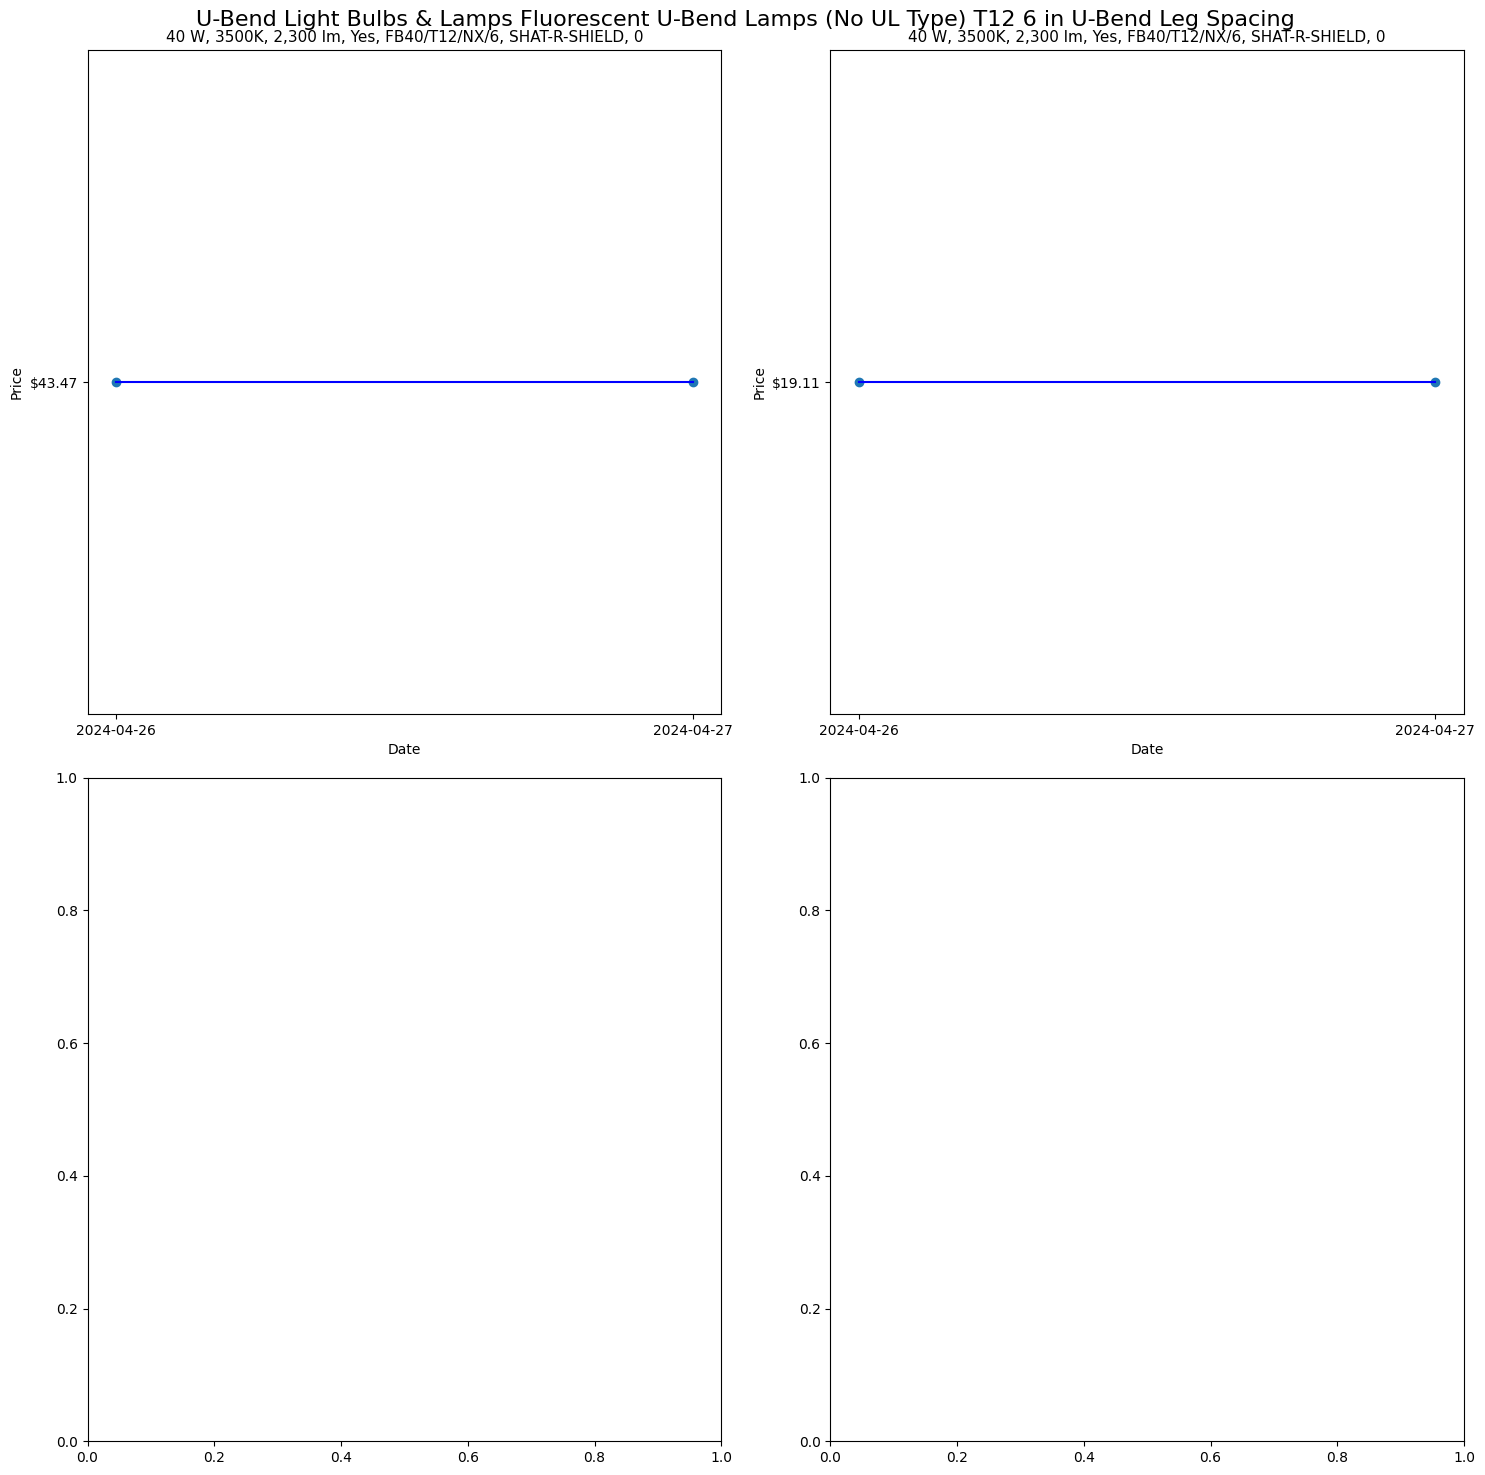

Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['LED Plug & Play (UL Type A) U-Bend Lamps']['T8 6 in U-Bend Leg Spacing']
df_2024-04-27_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['LED Plug & Play (UL Type A) U-Bend Lamps']['T8 6 in U-Bend Leg Spacing']


,Wattage,Date,Incandescent Wattage Equivalency,Color Temperature,Light Output,Shatter-Resistant,Bulb Designation,Brand,Price,Ref
0,13 W,2024-04-26,32 W,3000K,"2,000 lm",Yes,13T8-6U/MAS/24-830/IF20/P/DIM 10/1,PHILIPS,$26.40,0
10,13 W,2024-04-27,32 W,3000K,"2,000 lm",Yes,13T8-6U/MAS/24-830/IF20/P/DIM 10/1,PHILIPS,$26.40,0
1,13 W,2024-04-26,32 W,3500K,"1,800 lm",Yes,U13T8DF235,MAXLITE,$38.35,1
11,13 W,2024-04-27,32 W,3500K,"1,800 lm",Yes,U13T8DF235,MAXLITE,$38.35,1
2,13 W,2024-04-26,32 W,3500K,"1,850 lm",Yes,LED13ET8/U6/835,CURRENT,$28.25,2
12,13 W,2024-04-27,32 W,3500K,"1,850 lm",Yes,LED13ET8/U6/835,CURRENT,$28.25,2
3,13 W,2024-04-26,32 W,3500K,"2,000 lm",Yes,13T8-6U/MAS/24-835/IF20/P/DIM 10/1,PHILIPS,$27.87,3
13,13 W,2024-04-27,32 W,3500K,"2,000 lm",Yes,13T8-6U/MAS/24-835/IF20/P/DIM 10/1,PHILIPS,$27.87,3
4,13 W,2024-04-26,32 W,4000K,"1,850 lm",Yes,U13T8DF240,MAXLITE,$38.35,4
14,13 W,2024-04-27,32 W,4000K,"1,850 lm",Yes,U13T8DF240,MAXLITE,$38.35,4


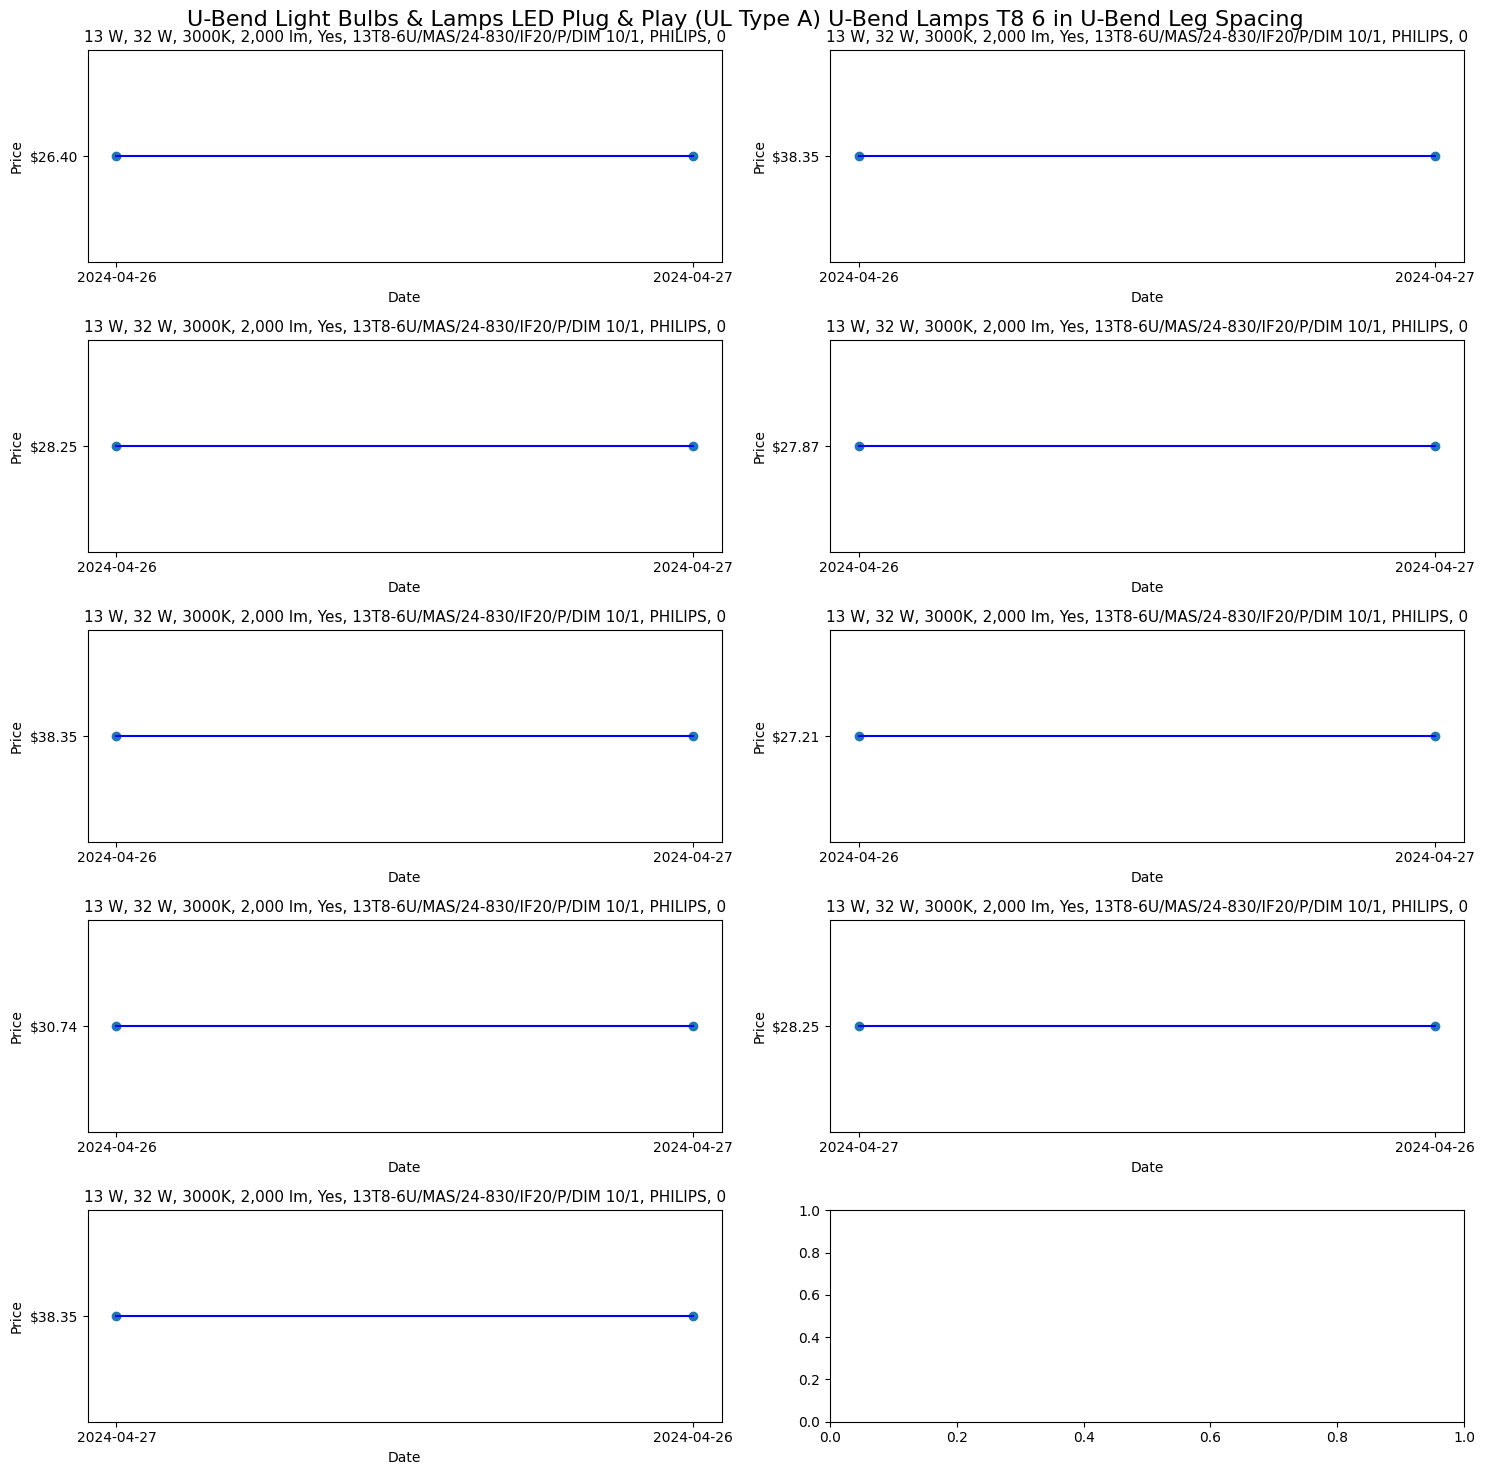

Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['Circular Light Bulbs & Lamps']['Circular Lamps']['Fluorescent']
df_2024-04-27_mon_fichier.json_data['Circular Light Bulbs & Lamps']['Circular Lamps']['Fluorescent']


,Bulb Shape,Date,Bulb Base Type,Circle Diameter,Wattage,Color Temperature,Light Output,Voltage,Bulb Designation,Brand,Price,Ref
7,T9,2024-04-26,4-Pin (G10q),12 in,31 W,3000K,"1,900 lm",84V AC,FC12T9,PHILIPS,$15.13,0
15,T9,2024-04-27,4-Pin (G10q),12 in,31 W,3000K,"1,900 lm",84V AC,FC12T9,PHILIPS,$15.13,0
3,T9,2024-04-26,4-Pin (G10q),12 in,31 W,4100K,"1,800 lm",84V AC,FC12T9,PHILIPS,$10.18,1
11,T9,2024-04-27,4-Pin (G10q),12 in,31 W,4100K,"1,800 lm",84V AC,FC12T9,PHILIPS,$10.18,1
4,T9,2024-04-26,4-Pin (G10q),12 in,32 W,4100K,"1,950 lm",230V AC,FC12T9/CW,CURRENT,$12.15,2
12,T9,2024-04-27,4-Pin (G10q),12 in,32 W,4100K,"1,950 lm",230V AC,FC12T9/CW,CURRENT,$12.15,2
5,T9,2024-04-26,4-Pin (G10q),16 in,39.5 W,4100K,"2,500 lm",109V AC,FC16T9,PHILIPS,$22.41,3
13,T9,2024-04-27,4-Pin (G10q),16 in,39.5 W,4100K,"2,500 lm",109V AC,FC16T9,PHILIPS,$22.41,3
6,T9,2024-04-26,4-Pin (G10q),8 in,20.5 W,3000K,"1,150 lm",61V AC,FC8T9,PHILIPS,$11.50,4
14,T9,2024-04-27,4-Pin (G10q),8 in,20.5 W,3000K,"1,150 lm",61V AC,FC8T9,PHILIPS,$11.50,4


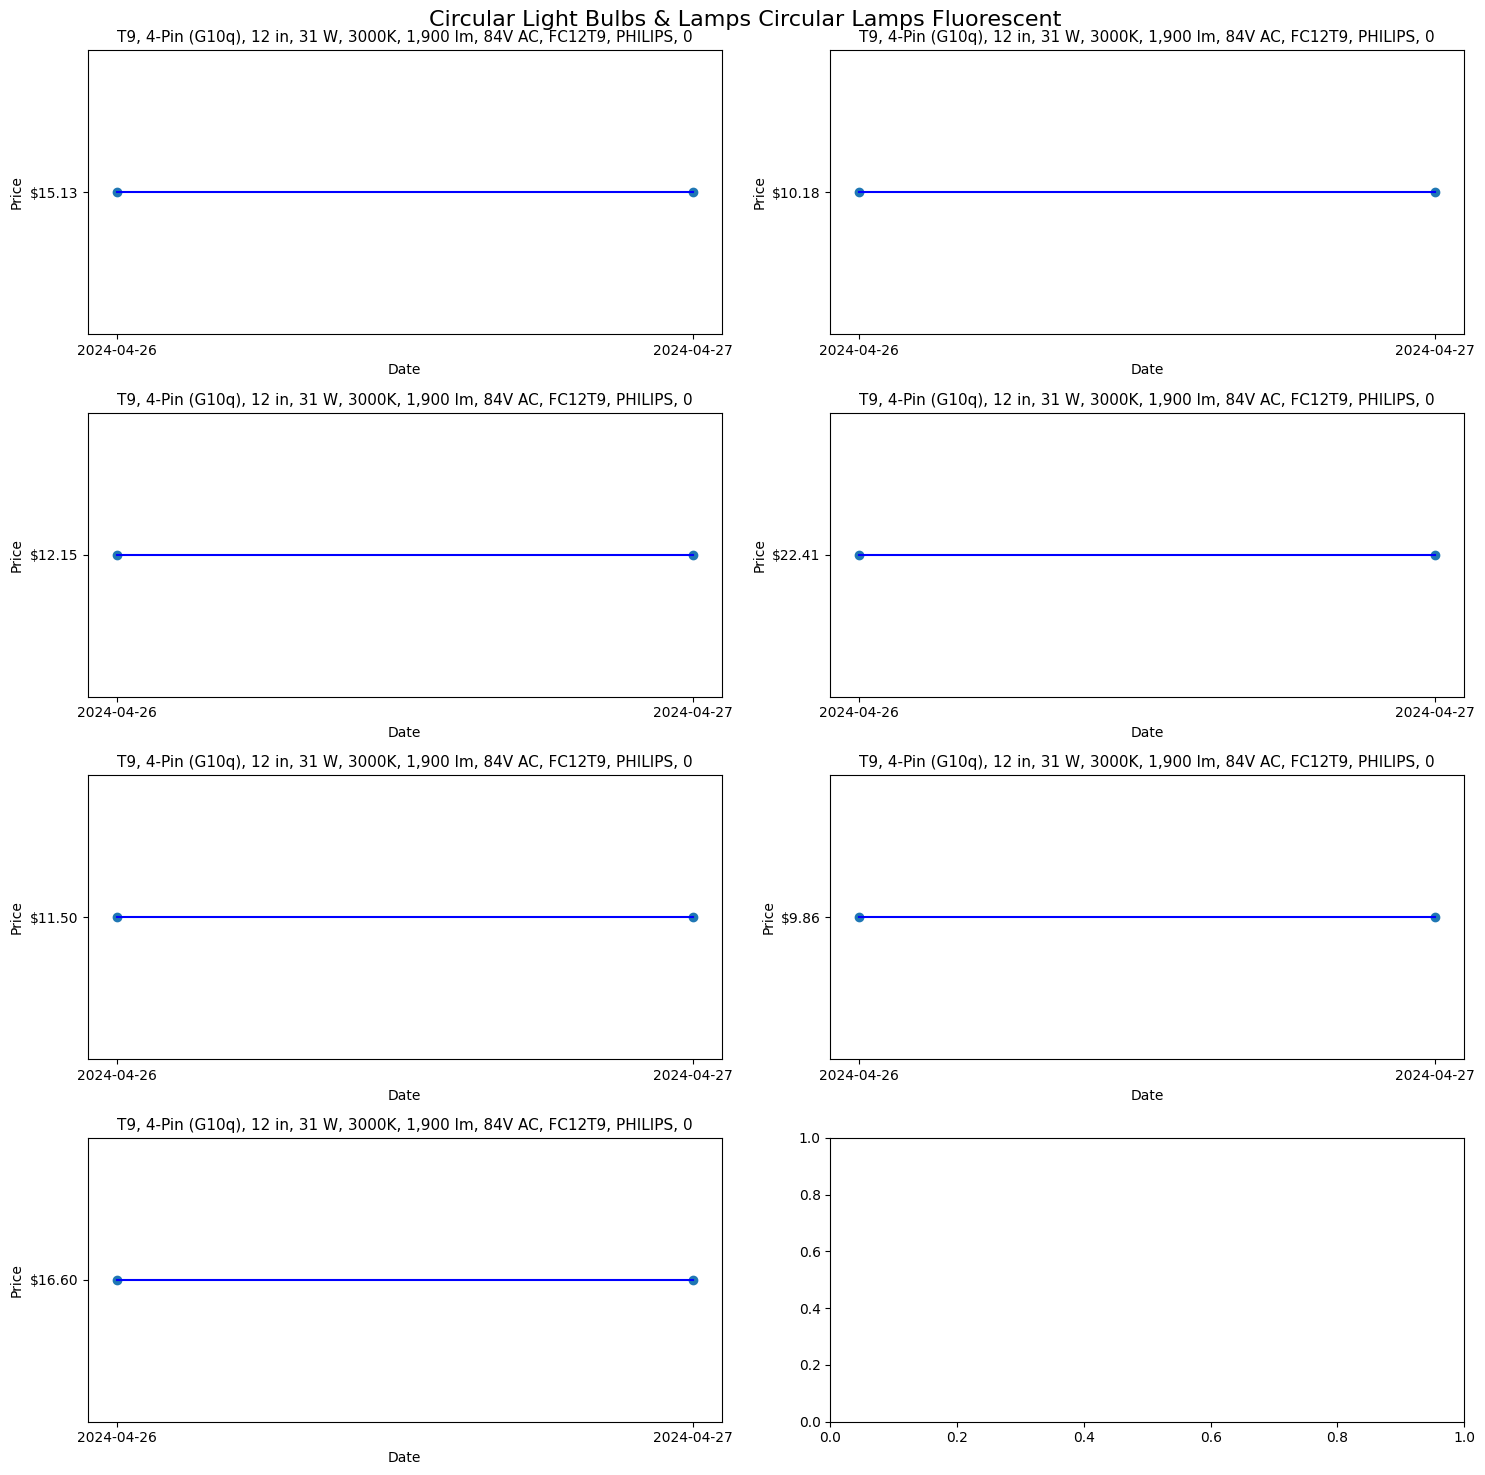

Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['Circular Light Bulbs & Lamps']['Circular Lamps']['LED']
df_2024-04-27_mon_fichier.json_data['Circular Light Bulbs & Lamps']['Circular Lamps']['LED']


,Bulb Shape,Date,Bulb Base Type,Circle Diameter,Wattage,Color Temperature,Light Output,Voltage,Bulb Designation,Brand,Price,Ref
1,T9,2024-04-26,4-Pin (G10q),12 in,20 W,4100K,"2,000 lm",————,FC12/840/LED,FEIT ELECTRIC,$25.26,0
3,T9,2024-04-27,4-Pin (G10q),12 in,20 W,4100K,"2,000 lm",————,FC12/840/LED,FEIT ELECTRIC,$25.26,0
0,T9,2024-04-26,4-Pin (G10q),8 in,15 W,4100K,"1,400 lm",————,FC8/840/LED,FEIT ELECTRIC,$21.60,1
2,T9,2024-04-27,4-Pin (G10q),8 in,15 W,4100K,"1,400 lm",————,FC8/840/LED,FEIT ELECTRIC,$21.60,1


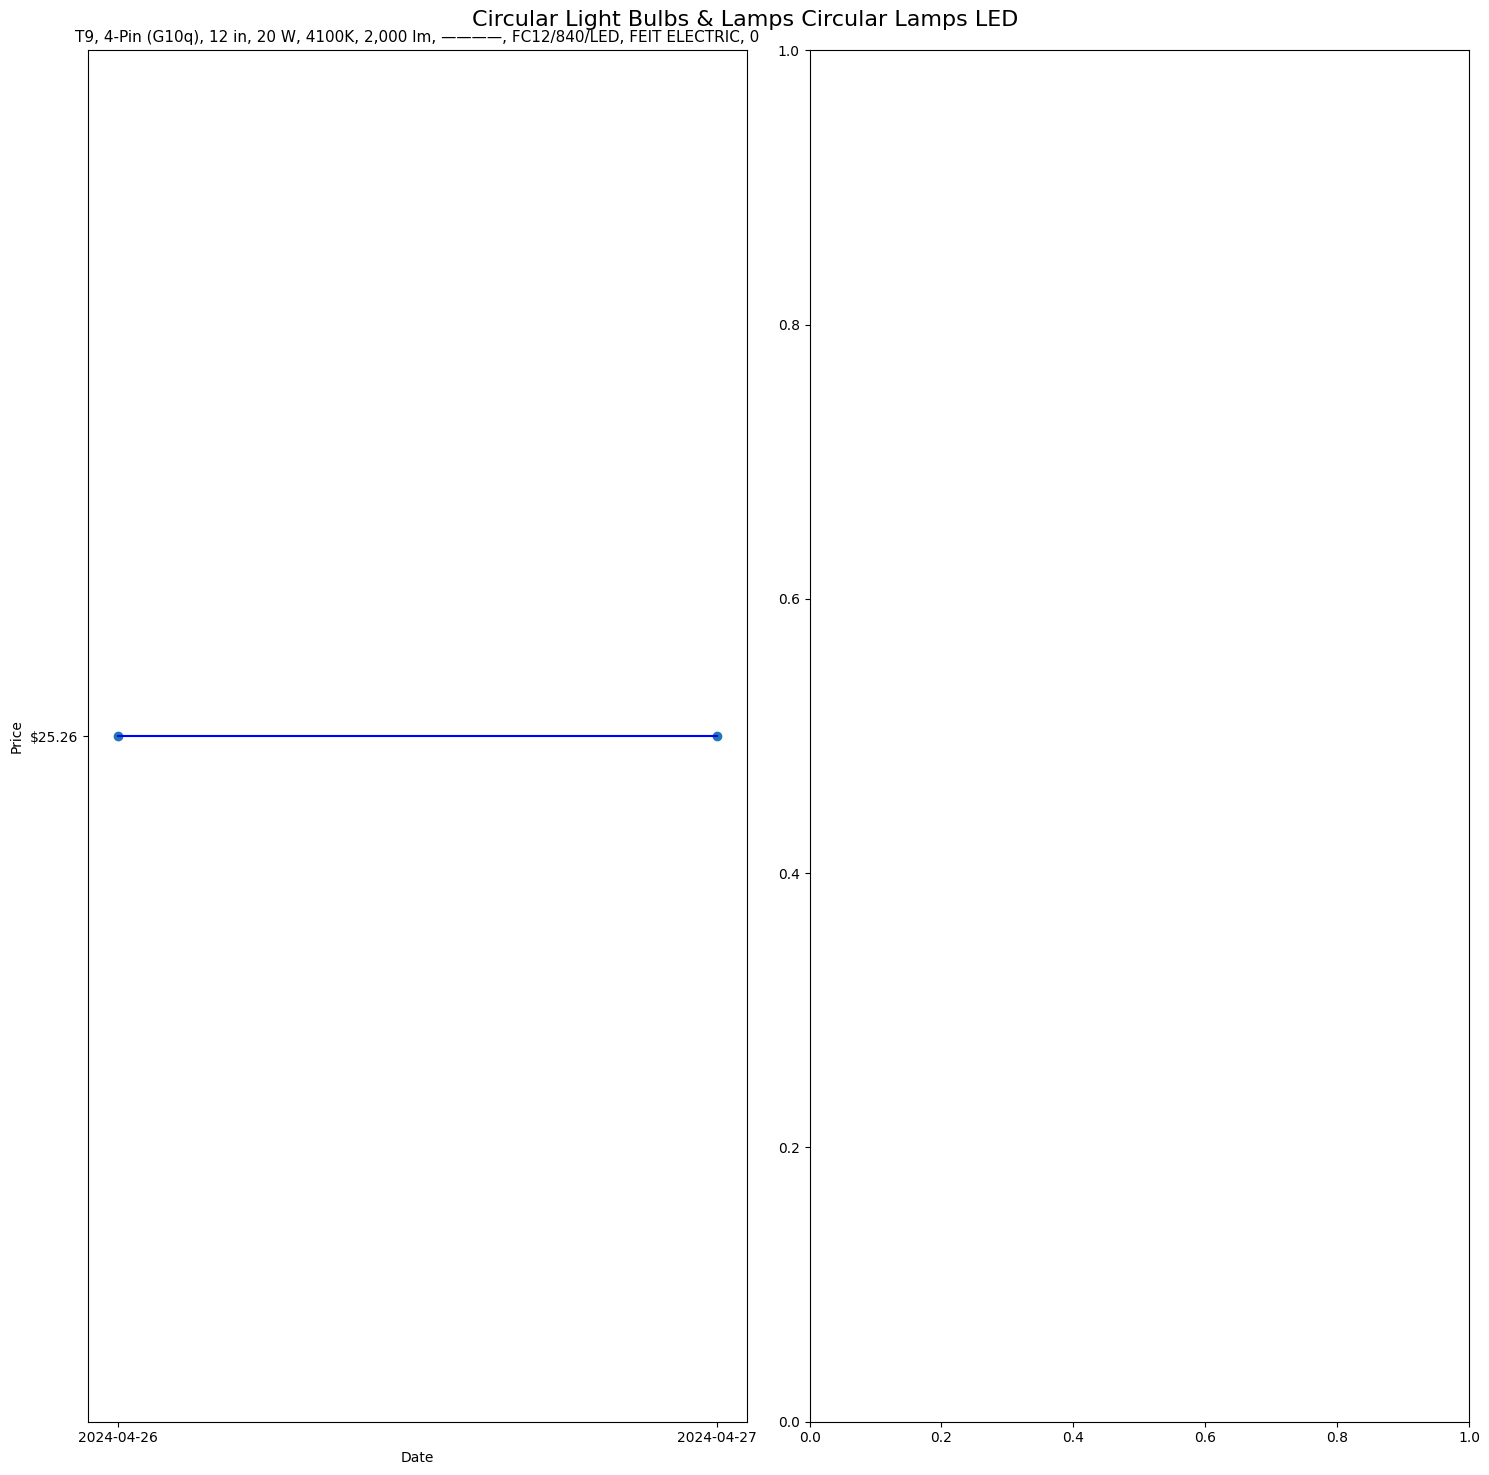

Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['Fluorescent U-Bend Lamps (No UL Type)']['T8 1-5/8 in U-Bend Leg Spacing']
df_2024-04-27_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['Fluorescent U-Bend Lamps (No UL Type)']['T8 1-5/8 in U-Bend Leg Spacing']


,Wattage,Date,Color Temperature,Light Output,Shatter-Resistant,Bulb Designation,Brand,Price,Ref
0,31 W,2024-04-26,3000K,"2,750 lm",No,FB31T8/TL830/ALTO,PHILIPS,$26.35,0
9,31 W,2024-04-27,3000K,"2,750 lm",No,FB31T8/TL830/ALTO,PHILIPS,$26.35,0
1,31 W,2024-04-26,3500K,"2,700 lm",No,F31T8/835/U3,LUMAPRO,$16.03,1
10,31 W,2024-04-27,3500K,"2,700 lm",No,F31T8/835/U3,LUMAPRO,$16.03,1
2,31 W,2024-04-26,3500K,"2,725 lm",No,FBO31/835,SYLVANIA,$14.41,2
11,31 W,2024-04-27,3500K,"2,725 lm",No,FBO31/835,SYLVANIA,$14.41,2
3,31 W,2024-04-26,3500K,"2,750 lm",No,FB31T8/TL835/ALTO,PHILIPS,$17.95,3
12,31 W,2024-04-27,3500K,"2,750 lm",No,FB31T8/TL835/ALTO,PHILIPS,$17.95,3
4,31 W,2024-04-26,3500K,"2,775 lm",No,F31T8SPX*/U/ECO,CURRENT,$20.04,4
13,31 W,2024-04-27,3500K,"2,775 lm",No,F31T8SPX*/U/ECO,CURRENT,$20.04,4


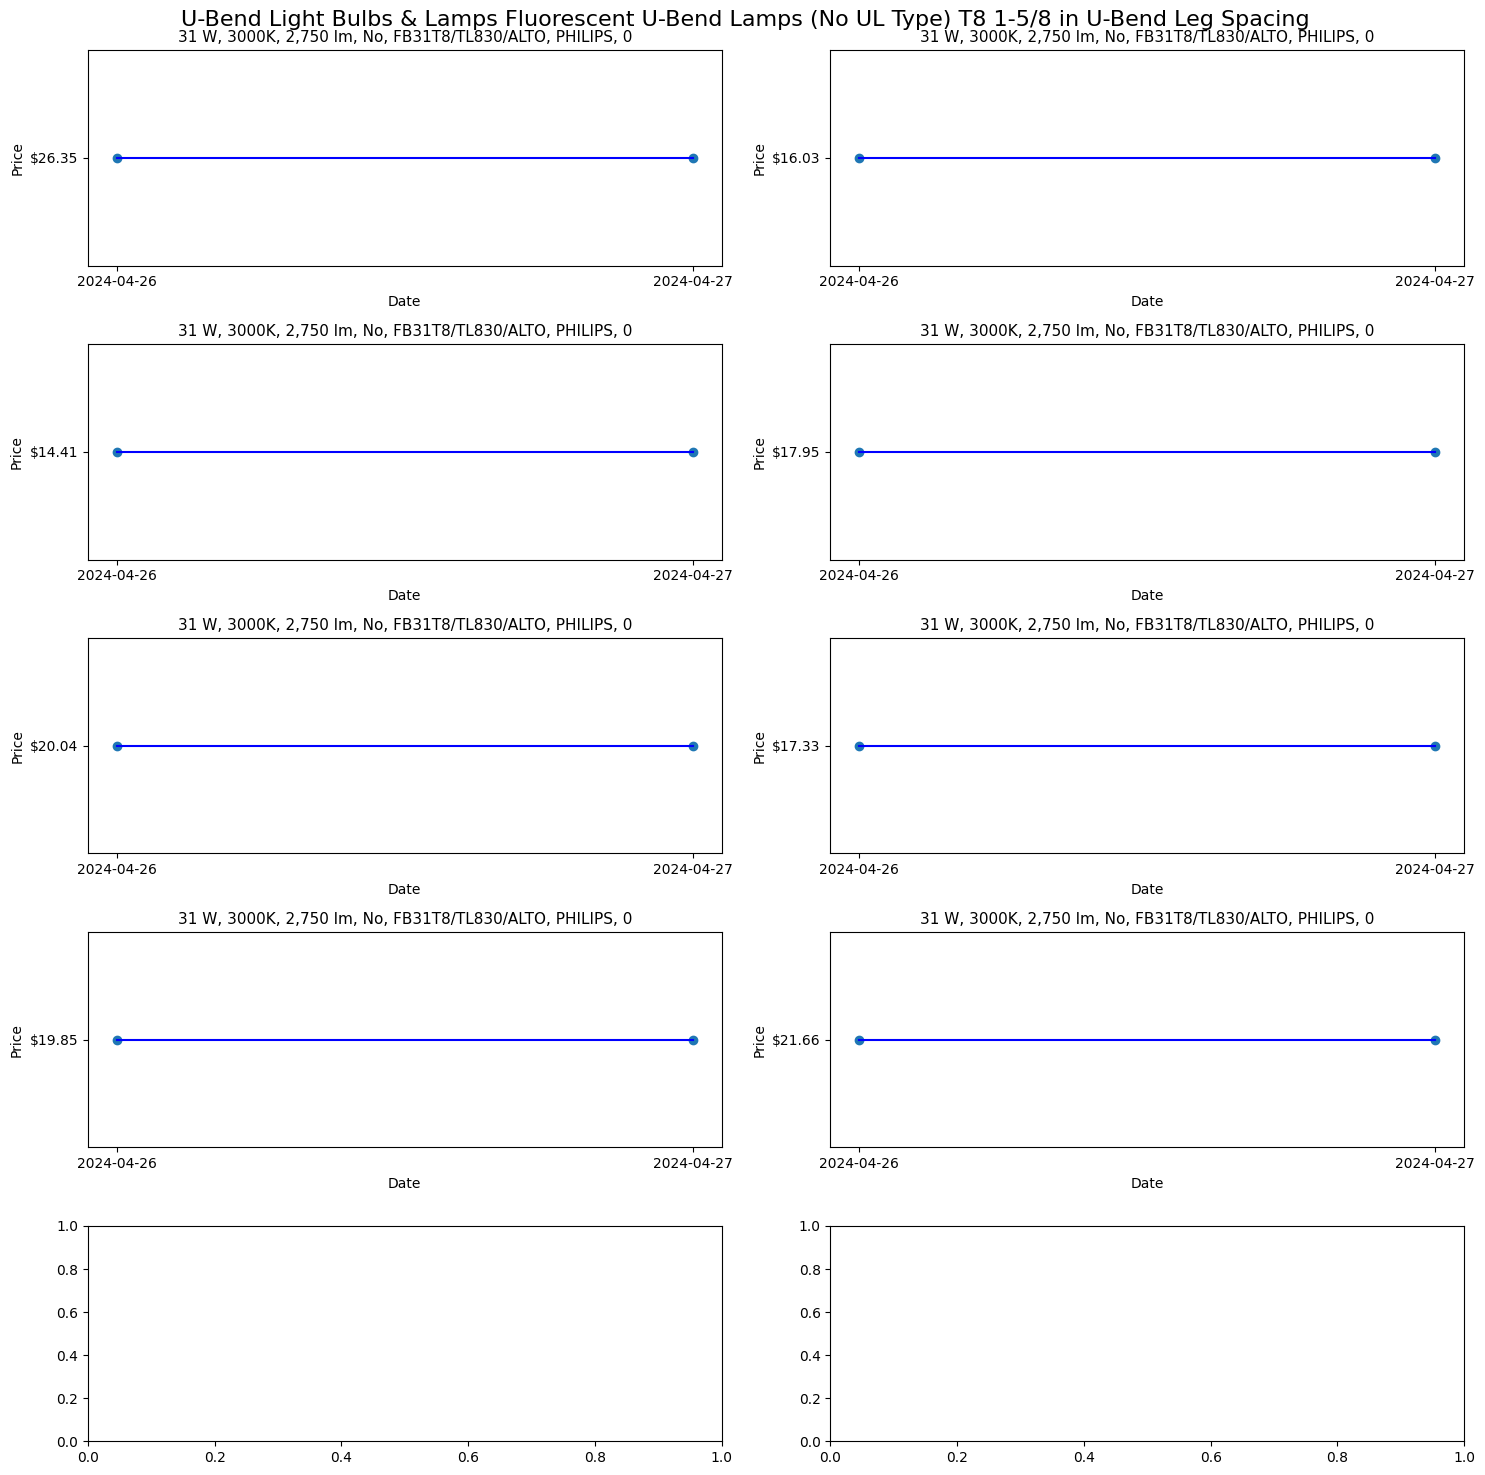

Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['LED Ballast-Bypass (UL Type B) U-Bend Lamps']['T8 6 in U-Bend Leg Spacing']
df_2024-04-27_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['LED Ballast-Bypass (UL Type B) U-Bend Lamps']['T8 6 in U-Bend Leg Spacing']


,Wattage,Date,Incandescent Wattage Equivalency,Color Temperature,Light Output,Shatter-Resistant,Bulb Designation,Brand,Price,Ref
2,13 W,2024-04-26,28 W; 32 W,3000K,"1,750 lm",No,LED13BDT8/U6/830,CURRENT,$32.90,0
12,13 W,2024-04-27,28 W; 32 W,3000K,"1,750 lm",No,LED13BDT8/U6/830,CURRENT,$32.90,0
3,13 W,2024-04-26,28 W; 32 W,3500K,"1,800 lm",No,LED13BDT8/U6/835,CURRENT,$32.90,1
13,13 W,2024-04-27,28 W; 32 W,3500K,"1,800 lm",No,LED13BDT8/U6/835,CURRENT,$32.90,1
4,13 W,2024-04-26,28 W; 32 W,4000K,"1,850 lm",No,LED13BDT8/U6/840,CURRENT,$32.90,2
14,13 W,2024-04-27,28 W; 32 W,4000K,"1,850 lm",No,LED13BDT8/U6/840,CURRENT,$32.90,2
5,13 W,2024-04-26,28 W; 32 W,5000K,"1,850 lm",No,LED13BDT8/U6/850,CURRENT,$32.90,3
15,13 W,2024-04-27,28 W; 32 W,5000K,"1,850 lm",No,LED13BDT8/U6/850,CURRENT,$32.90,3
0,15 W,2024-04-26,32 W,3500K,"1,800 lm",Yes,U15.5T8SE235,MAXLITE,$40.88,4
10,15 W,2024-04-27,32 W,3500K,"1,800 lm",Yes,U15.5T8SE235,MAXLITE,$40.88,4


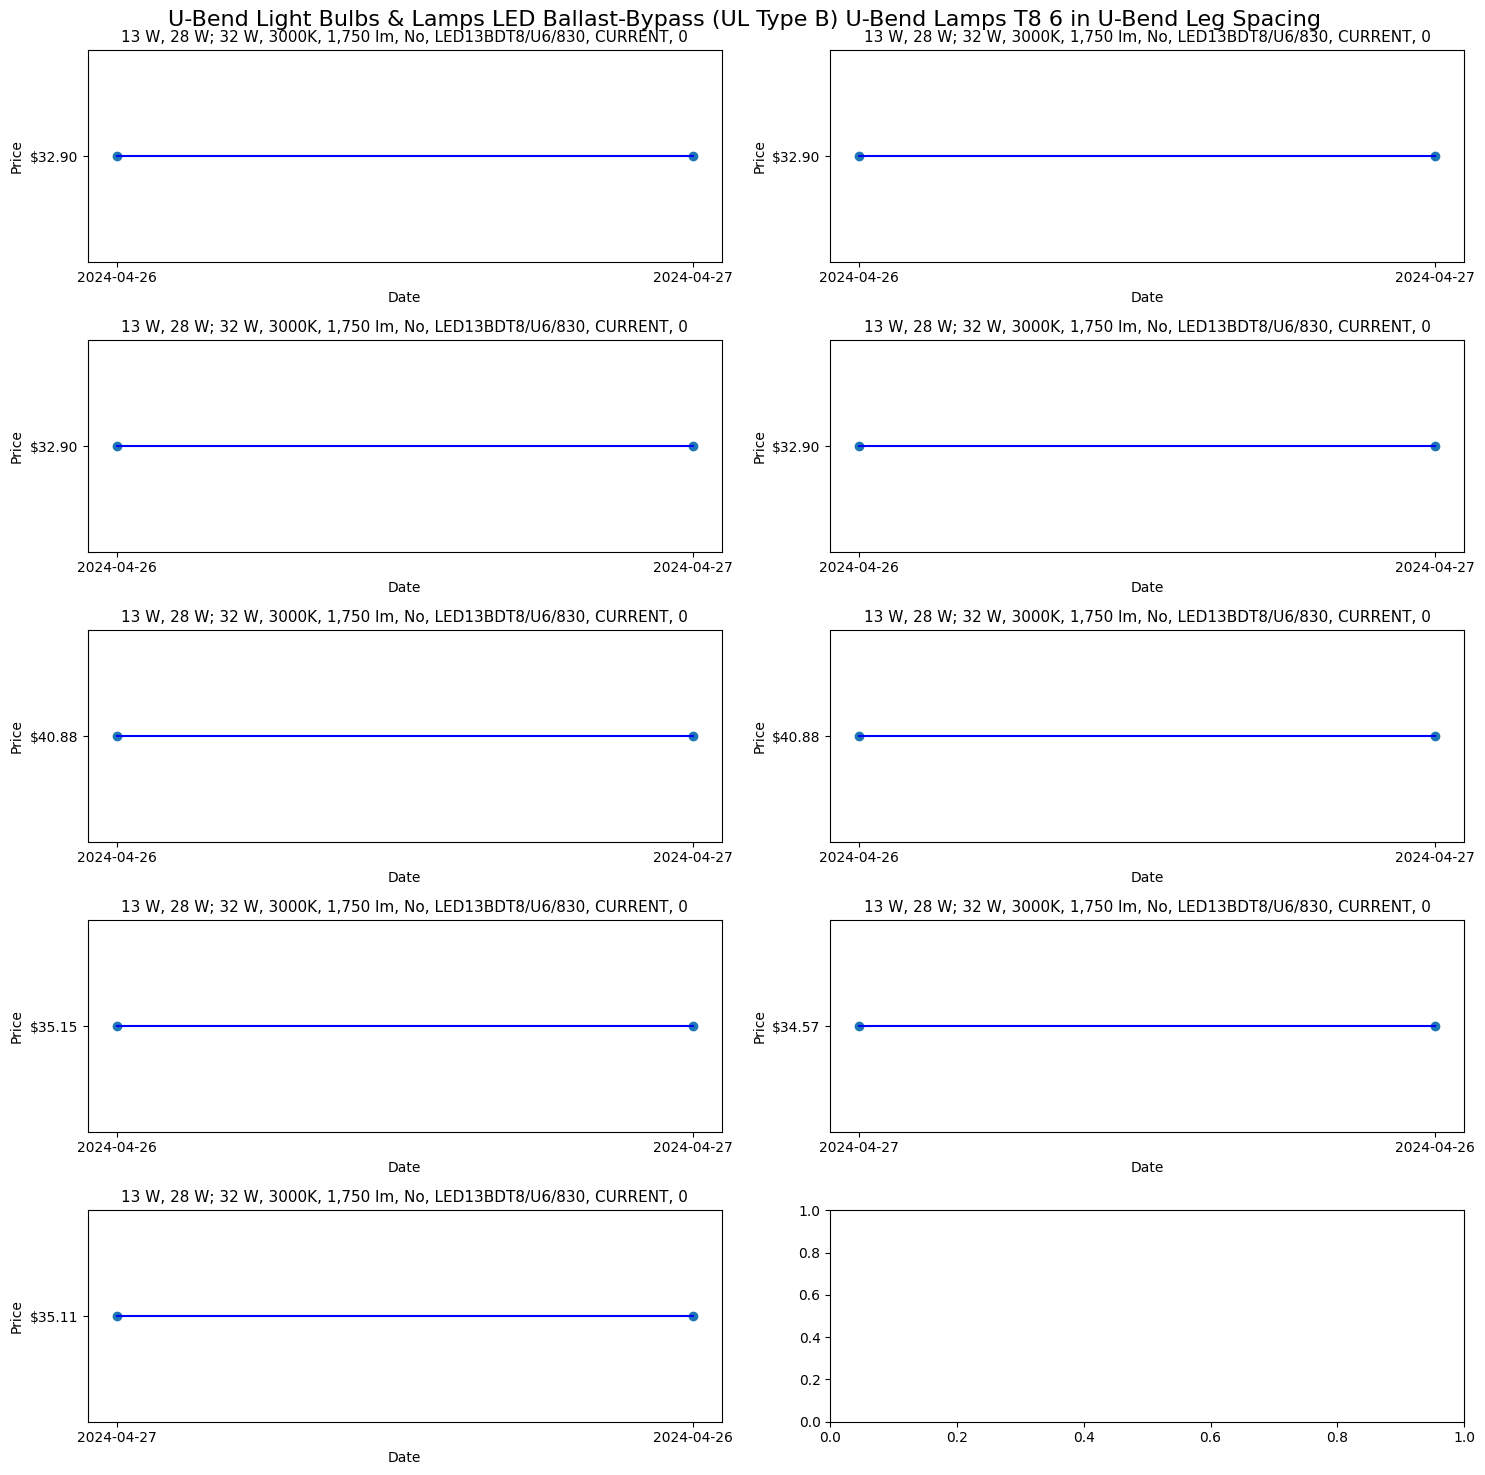

Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['Fluorescent U-Bend Lamps (No UL Type)']['T8 6 in U-Bend Leg Spacing']
df_2024-04-27_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['Fluorescent U-Bend Lamps (No UL Type)']['T8 6 in U-Bend Leg Spacing']


,Wattage,Date,Color Temperature,Light Output,Shatter-Resistant,Bulb Designation,Brand,Price,Ref
25,25 W,2024-04-27,4100K,"2,400 lm",No,FB32T8/ADV841/6/XEW/ALTO 25W,PHILIPS,$22.35,0
3,25 W,2024-04-26,4100K,"2,400 lm",No,FB32T8/ADV841/6/XEW/ALTO 25W,PHILIPS,$22.35,0
4,32 W,2024-04-26,3000K,"2,700 lm",No,F32T8/SP*/U/6/ECO,CURRENT,$15.79,1
26,32 W,2024-04-27,3000K,"2,700 lm",No,F32T8/SP*/U/6/ECO,CURRENT,$15.79,1
27,32 W,2024-04-27,3000K,"2,800 lm",No,F32T8/830/U6,LUMAPRO,$21.51,2
5,32 W,2024-04-26,3000K,"2,800 lm",No,F32T8/830/U6,LUMAPRO,$21.51,2
28,32 W,2024-04-27,3000K,"2,800 lm",No,FB32T8/TL830/6/ALTO,PHILIPS,$20.69,3
6,32 W,2024-04-26,3000K,"2,800 lm",No,FB32T8/TL830/6/ALTO,PHILIPS,$20.69,3
22,32 W,2024-04-27,3000K,"2,800 lm",Yes,FB32T8/TL830/6/ALTO,SHAT-R-SHIELD,$35.77,4
0,32 W,2024-04-26,3000K,"2,800 lm",Yes,FB32T8/TL830/6/ALTO,SHAT-R-SHIELD,$35.77,4


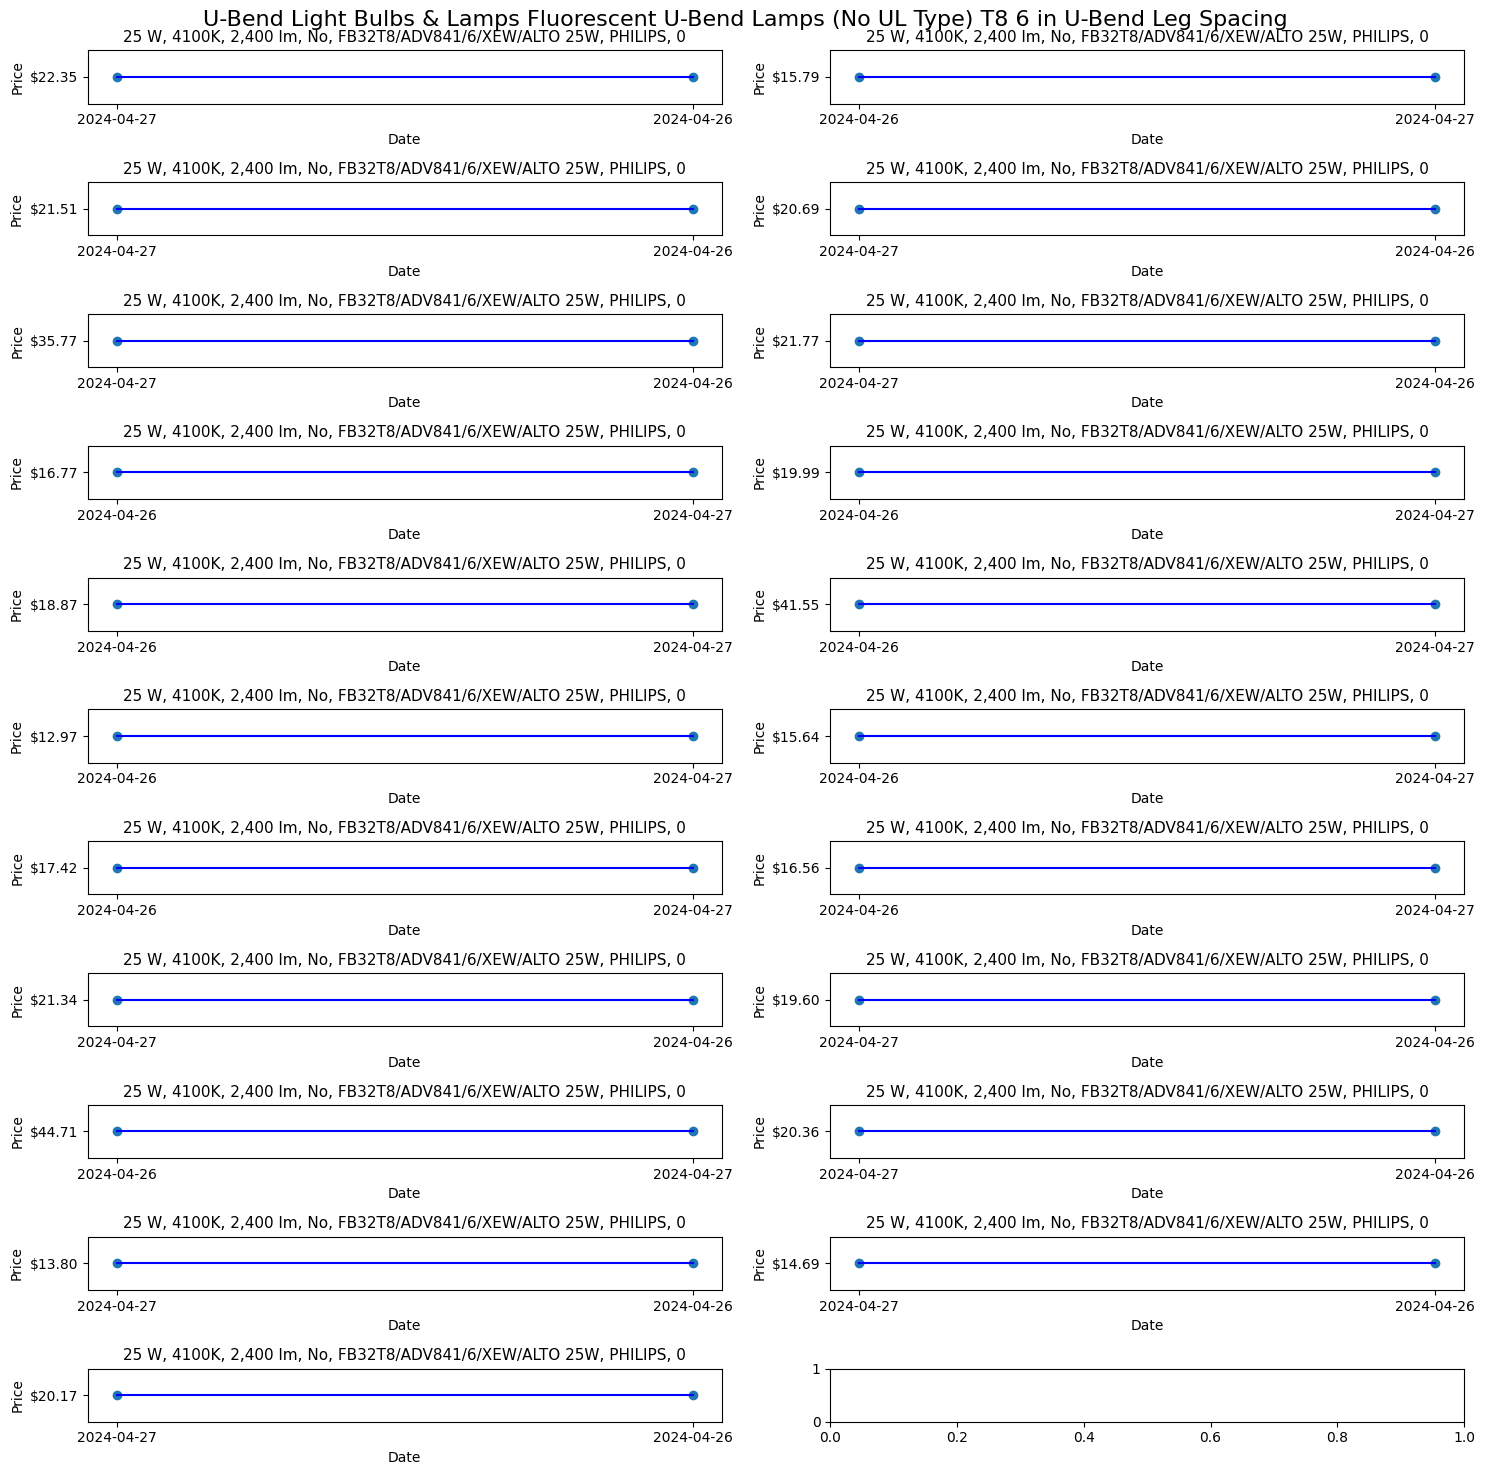

Clés correspondantes au modèle regex :
df_2024-04-26_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['LED Ballast-Bypass (UL Type B) U-Bend Lamps']['T8 1-5/8 in U-Bend Leg Spacing']
df_2024-04-27_mon_fichier.json_data['U-Bend Light Bulbs & Lamps']['LED Ballast-Bypass (UL Type B) U-Bend Lamps']['T8 1-5/8 in U-Bend Leg Spacing']


,Wattage,Date,Incandescent Wattage Equivalency,Color Temperature,Light Output,Shatter-Resistant,Bulb Designation,Brand,Price,Ref
0,13 W,2024-04-26,28 W; 32 W,3500K,"1,800 lm",No,LED13BDT8/U/835,CURRENT,$31.54,0
3,13 W,2024-04-27,28 W; 32 W,3500K,"1,800 lm",No,LED13BDT8/U/835,CURRENT,$31.54,0
1,13 W,2024-04-26,28 W; 32 W,4000K,"1,850 lm",No,LED13BDT8/U/840,CURRENT,$31.54,1
4,13 W,2024-04-27,28 W; 32 W,4000K,"1,850 lm",No,LED13BDT8/U/840,CURRENT,$31.54,1
2,13 W,2024-04-26,28 W; 32 W,5000K,"1,850 lm",No,LED13BDT8/U/850,CURRENT,$32.90,2
5,13 W,2024-04-27,28 W; 32 W,5000K,"1,850 lm",No,LED13BDT8/U/850,CURRENT,$32.90,2


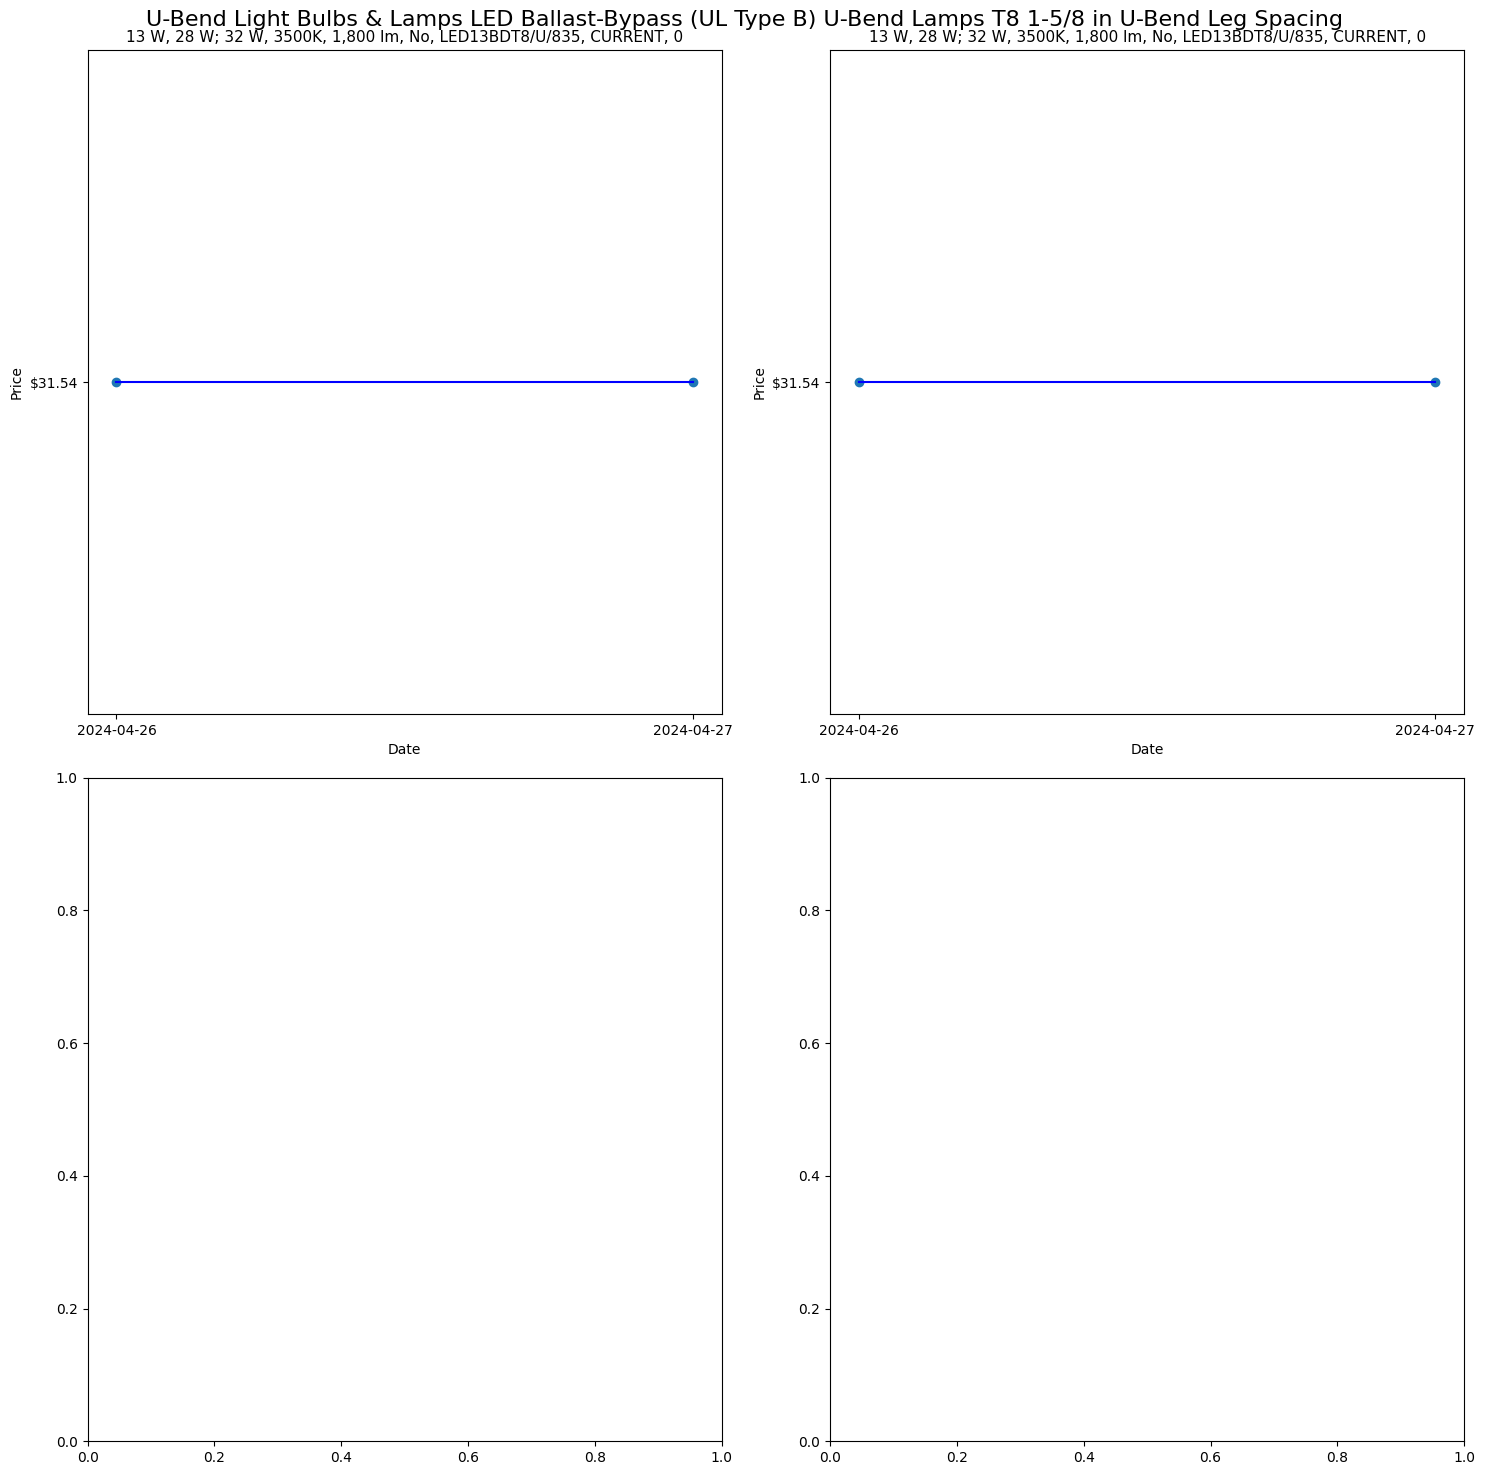

In [16]:
#Here, we want to concate the dataset of everydate : If I scrapped some lightings yesterday and today, I want to concat both (or more) datasets using the names given before and regex
for request in requests_saved_cleaned: 
    modele_regex = r"df_\d{4}-\d{2}-\d{2}_mon_fichier\.json_data" + re.escape(request)

    cles_trouvees = []

    for cle in dataframes.keys():
        
        # Vérification si la clé correspond au modèle regex
        if re.match(modele_regex, cle):
            cles_trouvees.append(cle)

    print("Clés correspondantes au modèle regex :")
    dataframes_to_concat = []
    for cle_trouvee in cles_trouvees:
        print(cle_trouvee)
        dataframes_to_concat.append(dataframes[cle_trouvee])

    df_concatene = pd.concat(dataframes_to_concat, ignore_index=True)
    
    #In order to thing the same items, I attribute them a Ref number. If the items is the same, everything but price and date has to be the same
    colonnes_a_exclure = ['Date', 'Price']

    df_concatene['Ref'] = df_concatene.groupby([colonne for colonne in df_concatene.columns if colonne not in colonnes_a_exclure]).ngroup()
    df_concatene.sort_values(by=['Ref'], inplace=True)
    
    display(df_concatene)

    fig, axes = plt.subplots(nrows=(max(df_concatene['Ref']) // 2) + 1, ncols=2, figsize=(15, 15))
    fig.suptitle(request.replace("[", "").replace("]", "").replace("''", " ").replace("'", ""), fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < max(df_concatene['Ref']):
            df = df_concatene[df_concatene['Ref'] == i]
            ax.plot(df['Date'], df['Price'], color='blue', linestyle='-')  
            ax.scatter(x=df['Date'], y=df['Price'])
            ax.set_xlabel('Date')
            ax.set_ylabel('Price')
            
            first_row_values = df_concatene.drop(columns=['Date', 'Price']).iloc[0].values
            string_first_row = ', '.join(map(str, first_row_values))
            ax.set_title(string_first_row, fontsize = 11)

    plt.tight_layout()

    plt.show()